In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
train = pd.read_csv('../../../datasets/insurance/train.csv')
test = pd.read_csv('../../../datasets/insurance/test.csv')

In [34]:
pd.set_option('display.max_columns', None)
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

## data pre processing

In [37]:
df = train.copy()

In [38]:
df.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [39]:
test.isnull().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [40]:
print(f"Education Level: {df['Education Level'].unique()}")
print(f"Occupation: {df['Occupation'].unique()}")
print(f"Location: {df['Location'].unique()}")
print(f"Policy Type: {df['Policy Type'].unique()}")
print(f"Policy Start Date: {df['Policy Start Date'].unique()}")
print(f"Customer Feedback: {df['Customer Feedback'].unique()}")
print(f"Smoking Status: {df['Smoking Status'].unique()}")
print(f"Exercise Frequency: {df['Exercise Frequency'].unique()}")
print(f"Property Type: {df['Property Type'].unique()}")

Education Level: ["Bachelor's" "Master's" 'High School' 'PhD']
Occupation: ['Self-Employed' nan 'Employed' 'Unemployed']
Location: ['Urban' 'Rural' 'Suburban']
Policy Type: ['Premium' 'Comprehensive' 'Basic']
Policy Start Date: ['2023-12-23 15:21:39.134960' '2023-06-12 15:21:39.111551'
 '2023-09-30 15:21:39.221386' ... '2021-04-28 15:21:39.129190'
 '2019-11-14 15:21:39.201446' '2020-10-19 15:21:39.118178']
Customer Feedback: ['Poor' 'Average' 'Good' nan]
Smoking Status: ['No' 'Yes']
Exercise Frequency: ['Weekly' 'Monthly' 'Daily' 'Rarely']
Property Type: ['House' 'Apartment' 'Condo']


In [41]:
# df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0], inplace=True)
# df.drop(df['Policy Start Date'].index, inplace=True)

In [42]:
def fill_missing_values(df, columns):
    for col in columns:
        if col in df.columns:
            if df[col].dtype in ['int64', 'float64']:
                df[col] = df[col].fillna(df[col].mean())
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
    return df

In [43]:
df.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [44]:
missing_value_columns = ['Age', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Occupation',
                         'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Customer Feedback', 'Insurance Duration']
fill_missing_values(df, missing_value_columns)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.000000,Married,1.000000,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.000000,17.0,372.00000,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.000000,Divorced,3.000000,Master's,Employed,15.569731,Rural,Comprehensive,1.000000,12.0,694.00000,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.000000,Divorced,3.000000,High School,Self-Employed,47.177549,Suburban,Premium,1.000000,14.0,592.92435,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.000000,Married,2.000000,Bachelor's,Employed,10.938144,Rural,Basic,1.000000,0.0,367.00000,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.000000,Single,1.000000,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.000000,8.0,598.00000,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.000000,Married,0.000000,Master's,Unemployed,13.772907,Urban,Premium,1.002689,5.0,372.00000,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.000000,Divorced,2.009934,Master's,Self-Employed,11.483482,Rural,Comprehensive,1.002689,10.0,597.00000,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.000000,Divorced,0.000000,Master's,Employed,14.724469,Suburban,Basic,0.000000,19.0,592.92435,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,32745.217777,Single,1.000000,PhD,Employed,18.547381,Suburban,Premium,1.000000,7.0,407.00000,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [45]:
df.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.00000,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,Comprehensive,1.0,12.0,694.00000,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,592.92435,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Employed,10.938144,Rural,Basic,1.0,0.0,367.00000,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.00000,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,Employed,33.053198,Urban,Premium,2.0,4.0,614.00000,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,Employed,25.613908,Rural,Basic,2.0,8.0,807.00000,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.00000,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,Employed,17.869551,Urban,Premium,1.0,10.0,685.00000,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.00000,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


In [46]:
def encode_columns(df, encoding_dict):
    """
    Encodes specified columns in the DataFrame based on the encoding dictionary.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    encoding_dict (dict): Dictionary with two keys:
        - "binary": List of column names to be binary encoded.
        - "onehot": List of column names to be one-hot encoded.
        
    Returns:
    pd.DataFrame: The modified DataFrame with encoded columns.
    """
    # Binary encode columns
    for col in encoding_dict.get("binary", []):
        # Ensure column has only two unique values before binary encoding
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) == 2:
            df[col] = df[col].map({unique_vals[0]: 0, unique_vals[1]: 1})
        else:
            print(f"Warning: Column '{col}' is not binary and cannot be binary encoded.")
    
    # One-hot encode columns
    df = pd.get_dummies(df, columns=encoding_dict.get("onehot", []), drop_first=True)    
    return df

In [47]:
# Gender: ['Female' 'Male']
# Marital Status: ['Married' 'Divorced' 'Single' nan]

encoding_dict = {
    "binary": ['Gender', 'Smoking Status'],
    "onehot": ['Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Exercise Frequency', 'Property Type']
}
encoded_df = encode_columns(df, encoding_dict)

In [48]:
encoded_df.head()

,id,Age,Gender,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Smoking Status,Premium Amount,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,0,19.0,0,10049.0,1.0,22.598761,2.0,17.0,372.00000,5.0,2023-12-23 15:21:39.134960,0,2869.0,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,True
1,1,39.0,0,31678.0,3.0,15.569731,1.0,12.0,694.00000,2.0,2023-06-12 15:21:39.111551,1,1483.0,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True
2,2,23.0,1,25602.0,3.0,47.177549,1.0,14.0,592.92435,3.0,2023-09-30 15:21:39.221386,1,567.0,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,True,False,True
3,3,21.0,1,141855.0,2.0,10.938144,1.0,0.0,367.00000,1.0,2024-06-12 15:21:39.226954,1,765.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,4,21.0,1,39651.0,1.0,20.376094,0.0,8.0,598.00000,4.0,2021-12-01 15:21:39.252145,1,2022.0,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,True


In [49]:
encoded_df['Policy Start Date'] = pd.to_datetime(encoded_df['Policy Start Date'])


In [50]:
encoded_df['year'] = encoded_df['Policy Start Date'].dt.year
encoded_df['month'] = encoded_df['Policy Start Date'].dt.month
encoded_df['day'] = encoded_df['Policy Start Date'].dt.day
encoded_df['weekday'] = encoded_df['Policy Start Date'].dt.weekday
encoded_df['quarter'] = encoded_df['Policy Start Date'].dt.quarter
encoded_df['day_of_year'] = encoded_df['Policy Start Date'].dt.dayofyear

In [51]:
encoded_df.drop(columns=['Policy Start Date'], inplace=True)

In [52]:
encoded_df.head()

,id,Age,Gender,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Premium Amount,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House,year,month,day,weekday,quarter,day_of_year
0,0,19.0,0,10049.0,1.0,22.598761,2.0,17.0,372.00000,5.0,0,2869.0,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,True,2023,12,23,5,4,357
1,1,39.0,0,31678.0,3.0,15.569731,1.0,12.0,694.00000,2.0,1,1483.0,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,2023,6,12,0,2,163
2,2,23.0,1,25602.0,3.0,47.177549,1.0,14.0,592.92435,3.0,1,567.0,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,True,False,True,2023,9,30,5,3,273
3,3,21.0,1,141855.0,2.0,10.938144,1.0,0.0,367.00000,1.0,1,765.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,2024,6,12,2,2,164
4,4,21.0,1,39651.0,1.0,20.376094,0.0,8.0,598.00000,4.0,1,2022.0,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,True,2021,12,1,2,4,335


In [53]:
encoded_df.isna().sum()

id                             0
Age                            0
Gender                         0
Annual Income                  0
Number of Dependents           0
Health Score                   0
Previous Claims                0
Vehicle Age                    0
Credit Score                   0
Insurance Duration             0
Smoking Status                 0
Premium Amount                 0
Marital Status_Married         0
Marital Status_Single          0
Education Level_High School    0
Education Level_Master's       0
Education Level_PhD            0
Occupation_Self-Employed       0
Occupation_Unemployed          0
Location_Suburban              0
Location_Urban                 0
Policy Type_Comprehensive      0
Policy Type_Premium            0
Customer Feedback_Good         0
Customer Feedback_Poor         0
Exercise Frequency_Monthly     0
Exercise Frequency_Rarely      0
Exercise Frequency_Weekly      0
Property Type_Condo            0
Property Type_House            0
year      

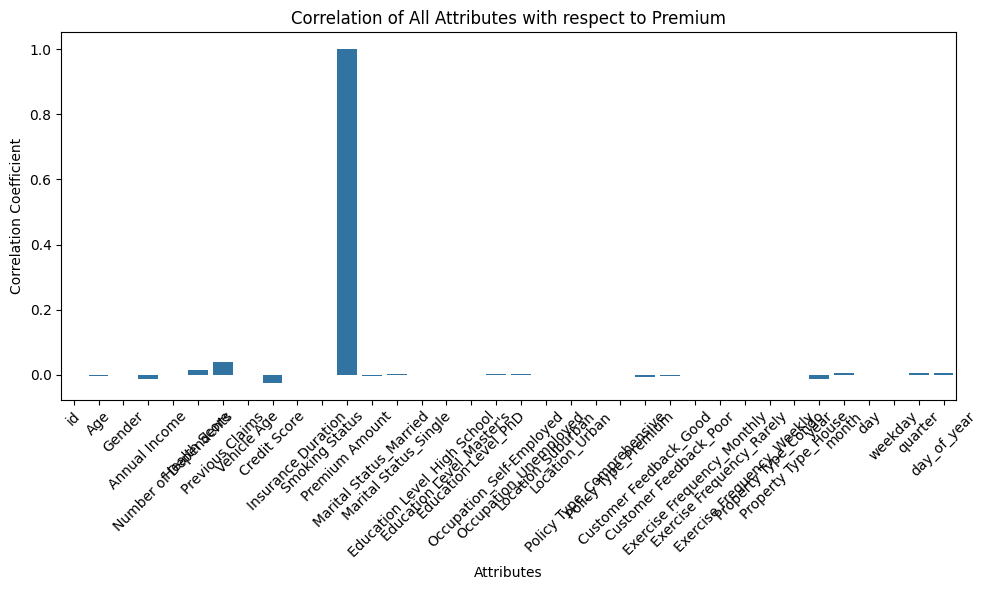

In [54]:
correlation_matrix = encoded_df.corr()
premium_correlation = correlation_matrix['Premium Amount']

# Plot the correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=premium_correlation.index, y=premium_correlation.values)
plt.xticks(rotation=45)
plt.title('Correlation of All Attributes with respect to Premium')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Attributes')
plt.tight_layout()
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [56]:

X = encoded_df.drop('Premium Amount', axis=1)  # Features
y = encoded_df['Premium Amount']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print(f"X shape --> {X.shape} :: Y shape --> {y.shape}")

X shape --> (1200000, 35) :: Y shape --> (1200000,)


In [58]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1),
    #'SVR': SVR(kernel='rbf', C=100, gamma=0.1),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
}

# 3. Initialize a list to store RMSE values
rmse_scores = []

# 4. Train each model and evaluate RMSE
for name, model in models.items():
    # Train the model
    print(f"Name -> {name}")
    print(f"X --> shape {X_train.shape}")
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    
    # Append the model name and its RMSE to the list
    rmse_scores.append((name, rmse))

# 5. Sort the models based on RMSE (ascending order) 
rmse_scores.sort(key=lambda x: x[1])

Name -> Linear Regression
X --> shape (960000, 35)
Name -> Ridge Regression
X --> shape (960000, 35)
Name -> Lasso Regression
X --> shape (960000, 35)
Name -> Decision Tree
X --> shape (960000, 35)
Name -> Random Forest
X --> shape (960000, 35)
Name -> Gradient Boosting
X --> shape (960000, 35)
Name -> XGBoost
X --> shape (960000, 35)
Name -> LightGBM
X --> shape (960000, 35)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1461
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 35
[LightGBM] [Info] Start training from score 1102.505529
Name -> KNN
X --> shape (960000, 35)
Name -> Neural Network
X --> shape (960000, 35)


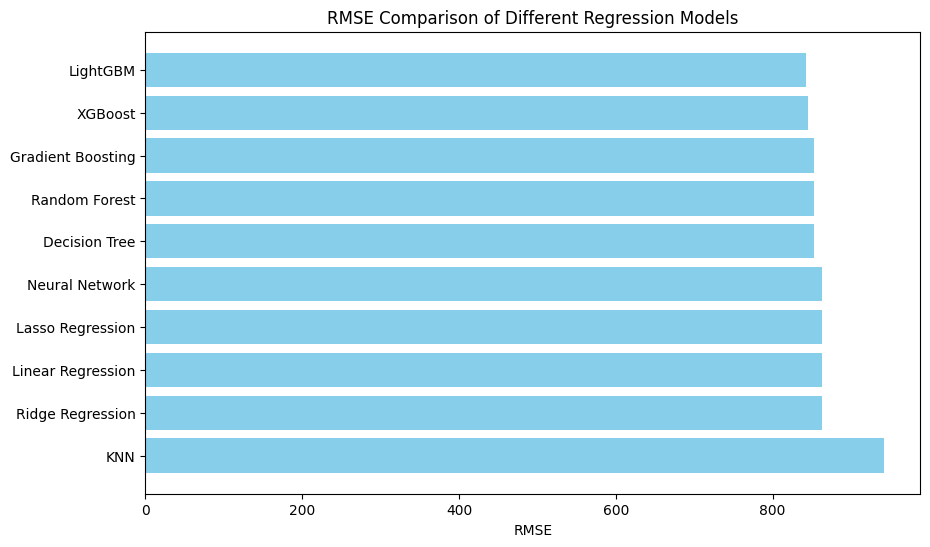

In [59]:
model_names = [x[0] for x in rmse_scores]
rmse_values = [x[1] for x in rmse_scores]

plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, color='skyblue')
plt.xlabel('RMSE')
plt.title('RMSE Comparison of Different Regression Models')
plt.gca().invert_yaxis()  # To display the best performing model at the top
plt.show()

In [60]:
test_ids = test['id']

In [61]:
fill_missing_values(test, missing_value_columns)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.00000,Female,2310.0,Single,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,1.004873,19.0,592.904749,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.00000,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,1.004873,14.0,372.000000,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.00000,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,1.004873,16.0,819.000000,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.00000,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.000000,3.0,770.000000,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.00000,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,1.004873,14.0,755.000000,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.00000,Female,38782.0,Married,1.0,Bachelor's,Employed,14.498639,Rural,Premium,1.004873,8.0,309.000000,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,1999996,41.13644,Female,73462.0,Single,0.0,Master's,Employed,8.145748,Rural,Basic,2.000000,0.0,592.904749,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,1999997,26.00000,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,1.004873,10.0,592.904749,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,1999998,34.00000,Female,45661.0,Single,3.0,Master's,Employed,15.937248,Urban,Premium,2.000000,17.0,467.000000,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


In [62]:
test.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
dtype: int64

In [63]:
encoded_df_test = encode_columns(test, encoding_dict)

In [64]:
encoded_df_test

,id,Age,Gender,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Smoking Status,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,1200000,28.00000,0,2310.0,4.0,7.657981,1.004873,19.0,592.904749,1.0,2023-06-04 15:21:39.245086,0,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
1,1200001,31.00000,0,126031.0,2.0,13.381379,1.004873,14.0,372.000000,8.0,2024-04-22 15:21:39.224915,0,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False
2,1200002,47.00000,0,17092.0,0.0,24.354527,1.004873,16.0,819.000000,9.0,2023-04-05 15:21:39.134960,0,False,False,False,False,True,False,True,False,True,True,False,False,False,True,False,False,True,False
3,1200003,28.00000,0,30424.0,3.0,5.136225,1.000000,3.0,770.000000,5.0,2023-10-25 15:21:39.134960,0,False,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False,True
4,1200004,24.00000,1,10863.0,2.0,11.844155,1.004873,14.0,755.000000,7.0,2021-11-26 15:21:39.259788,1,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.00000,0,38782.0,1.0,14.498639,1.004873,8.0,309.000000,2.0,2021-07-09 15:21:39.184157,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
799996,1999996,41.13644,0,73462.0,0.0,8.145748,2.000000,0.0,592.904749,2.0,2023-03-28 15:21:39.250151,1,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
799997,1999997,26.00000,0,35178.0,0.0,6.636583,1.004873,10.0,592.904749,6.0,2019-09-30 15:21:39.132191,1,False,True,False,True,False,False,False,False,True,True,False,False,True,True,False,False,False,False
799998,1999998,34.00000,0,45661.0,3.0,15.937248,2.000000,17.0,467.000000,7.0,2022-05-09 15:21:39.253660,1,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False


In [65]:
encoded_df_test['Policy Start Date'] = pd.to_datetime(encoded_df_test['Policy Start Date'])
encoded_df_test['year'] = encoded_df_test['Policy Start Date'].dt.year
encoded_df_test['month'] = encoded_df_test['Policy Start Date'].dt.month
encoded_df_test['day'] = encoded_df_test['Policy Start Date'].dt.day
encoded_df_test['weekday'] = encoded_df_test['Policy Start Date'].dt.weekday
encoded_df_test['quarter'] = encoded_df_test['Policy Start Date'].dt.quarter
encoded_df_test['day_of_year'] = encoded_df_test['Policy Start Date'].dt.dayofyear

In [66]:
encoded_df_test.drop(columns=['Policy Start Date'], inplace=True)

In [67]:
encoded_df_test.head()

,id,Age,Gender,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House,year,month,day,weekday,quarter,day_of_year
0,1200000,28.0,0,2310.0,4.0,7.657981,1.004873,19.0,592.904749,1.0,0,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,2023,6,4,6,2,155
1,1200001,31.0,0,126031.0,2.0,13.381379,1.004873,14.0,372.000000,8.0,0,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,2024,4,22,0,2,113
2,1200002,47.0,0,17092.0,0.0,24.354527,1.004873,16.0,819.000000,9.0,0,False,False,False,False,True,False,True,False,True,True,False,False,False,True,False,False,True,False,2023,4,5,2,2,95
3,1200003,28.0,0,30424.0,3.0,5.136225,1.000000,3.0,770.000000,5.0,0,False,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False,True,2023,10,25,2,4,298
4,1200004,24.0,1,10863.0,2.0,11.844155,1.004873,14.0,755.000000,7.0,1,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,2021,11,26,4,4,330


In [68]:
encoded_df_test = encoded_df_test.reindex(columns=X_train.columns, fill_value=0)

In [69]:
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1461
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 35
[LightGBM] [Info] Start training from score 1102.505529


LGBMRegressor()

In [70]:
test_predictions = lgb_model.predict(encoded_df_test)

In [72]:
test_predictions

array([1414.64053987, 1169.24230947, 1082.01859319, ..., 1112.687886  ,
       1149.21758741, 1060.27444835])

In [73]:
submission = pd.DataFrame({
    'id': test_ids,
    'Premium Amount': test_predictions
})

In [74]:
submission.head()

,id,Premium Amount
0,1200000,1414.640540
1,1200001,1169.242309
2,1200002,1082.018593
3,1200003,1092.058150
4,1200004,1035.739115


In [75]:
submission.to_csv('submission.csv', index=False)